In [2]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")
library(cowplot)
library(gg.gap)
library(ggpol)
options(warn=-1)


### Figure 6B

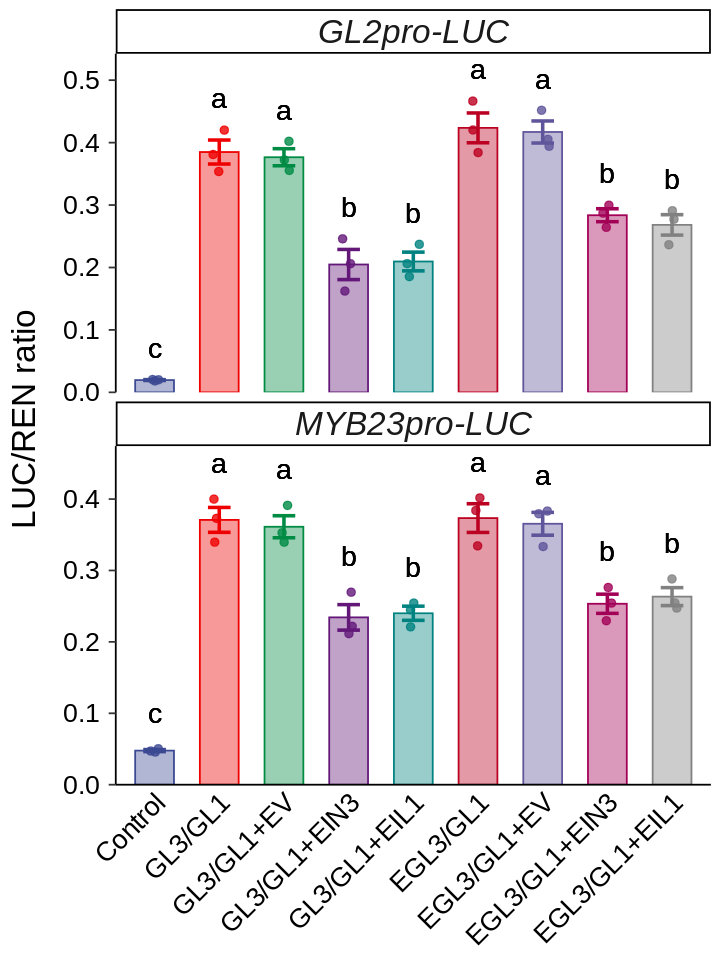

In [6]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(4:6)],1,max) + 0.05


# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$col_name <- factor(df_long$col_name, levels=c("Control",
                                                      "GL3/GL1",
                                                      "GL3/GL1+EV",
                                                      "GL3/GL1+EIN3",
                                                      "GL3/GL1+EIL1",
                                                      "EGL3/GL1",
                                                      "EGL3/GL1+EV",
                                                      "EGL3/GL1+EIN3",
                                                      "EGL3/GL1+EIL1"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 8)

p <- ggplot(df_long, aes(col_name, value, fill=col_name, color=col_name))

B6 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.6,
                 position = position_dodge(1),
                 alpha=0.4,
                 show.legend=FALSE
                 ) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.35, 
                 size=1,
                 show.legend=FALSE
                 ) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1,
                show.legend=FALSE
               ) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
    facet_wrap(~ treatment, 
               nrow=2, 
               scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
B6

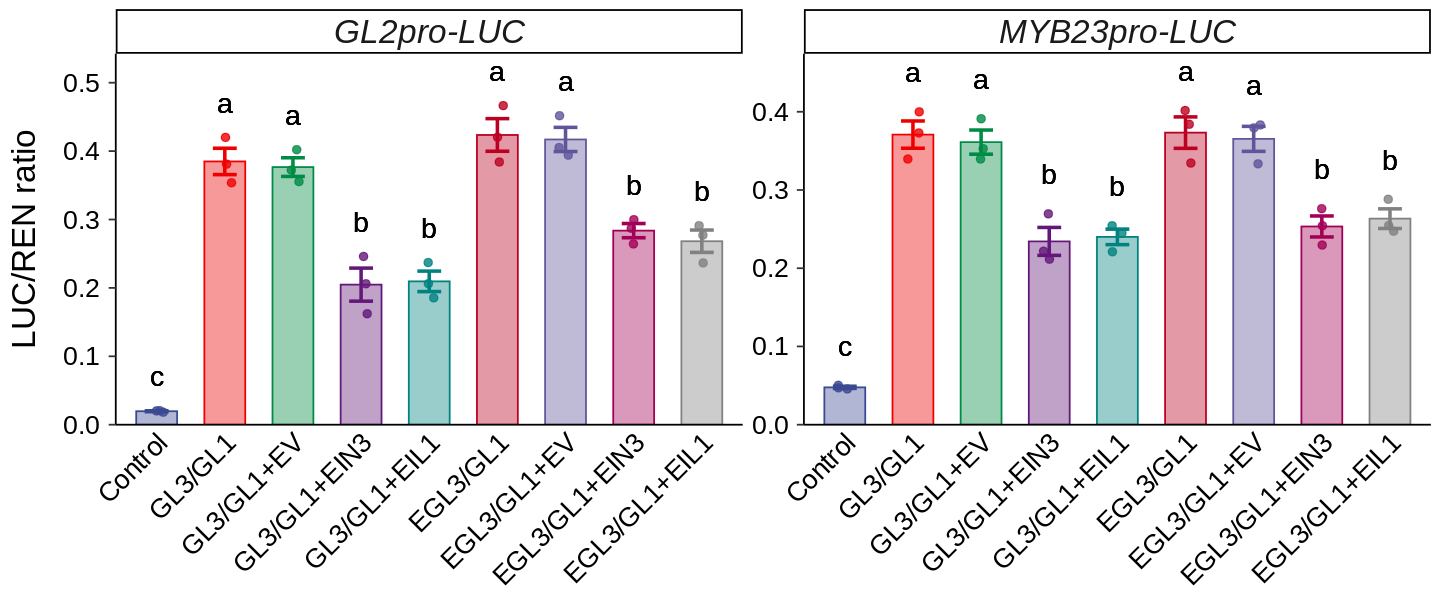

In [7]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(4:6)],1,max) + 0.05


# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$col_name <- factor(df_long$col_name, levels=c("Control",
                                                      "GL3/GL1",
                                                      "GL3/GL1+EV",
                                                      "GL3/GL1+EIN3",
                                                      "GL3/GL1+EIL1",
                                                      "EGL3/GL1",
                                                      "EGL3/GL1+EV",
                                                      "EGL3/GL1+EIN3",
                                                      "EGL3/GL1+EIL1"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 12, repr.plot.height = 5)

p <- ggplot(df_long, aes(col_name, value, fill=col_name, color=col_name))

B6 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.6,
                 position = position_dodge(1),
                 alpha=0.4,
                 show.legend=FALSE
                 ) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.35, 
                 size=1,
                 show.legend=FALSE
                 ) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1,
                show.legend=FALSE
               ) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
    facet_wrap(~ treatment, 
               nrow=1, 
               scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
B6

### Figure 6C

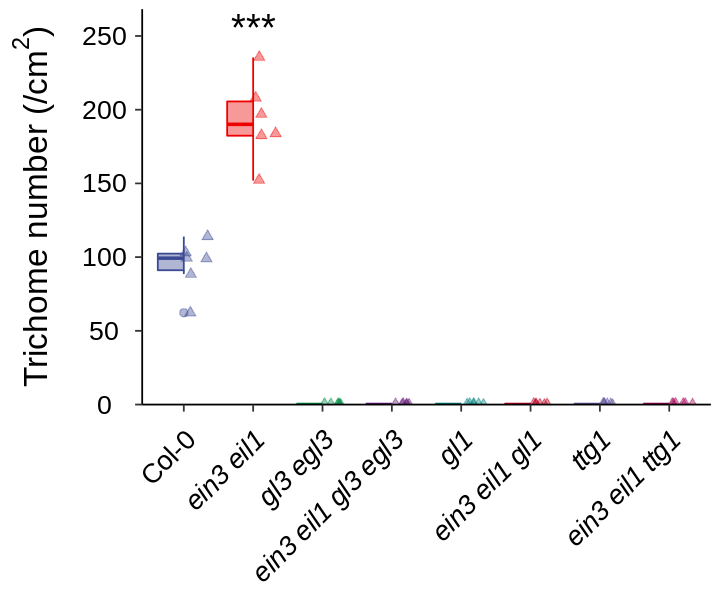

In [8]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6C.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:7)],1,max) + 20

# transformat df
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl1",
                                                      "ein3 eil1 gl1",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil1")),
               expression(italic("gl3 egl3")),
               expression(italic("ein3 eil1 gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ein3 eil1 gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1 ttg1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
C6 <- p + geom_boxjitter(alpha=0.4,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Trichome number (/cm" ^ "2" * ")")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
C6


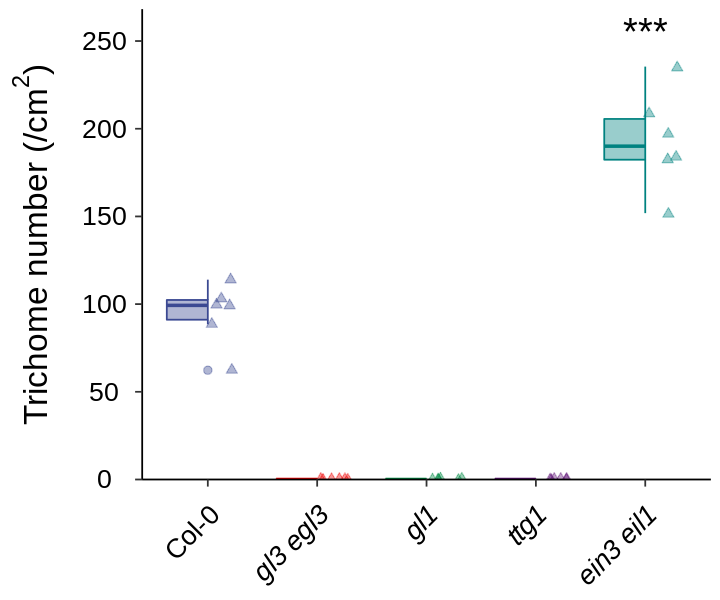

In [12]:
# for NSFC proposal
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6C.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

df  <- df[c(1,2,3,5,7),]

# set df for sig note
df$max <- apply(df[,c(2:7)],1,max) + 20

# transformat df
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",                                                      
                                                      "gl3 egl3",
#                                                       "ein3 eil1 gl3 egl3",
                                                      "gl1",
#                                                       "ein3 eil1 gl1",
                                                      "ttg1",
                                                      "ein3 eil1"
#                                                       "ein3 eil1 ttg1"
                                                     ))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

# generate x-tick label vector
xtick_labs <- c("Col-0",               
               expression(italic("gl3 egl3")),
#                expression(italic("ein3 eil1 gl3 egl3")),
               expression(italic("gl1")),
#                expression(italic("ein3 eil1 gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1"))
#                expression(italic("ein3 eil1 ttg1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
nsfc <- p + geom_boxjitter(alpha=0.4,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Trichome number (/cm" ^ "2" * ")")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
nsfc


### Figure 6D

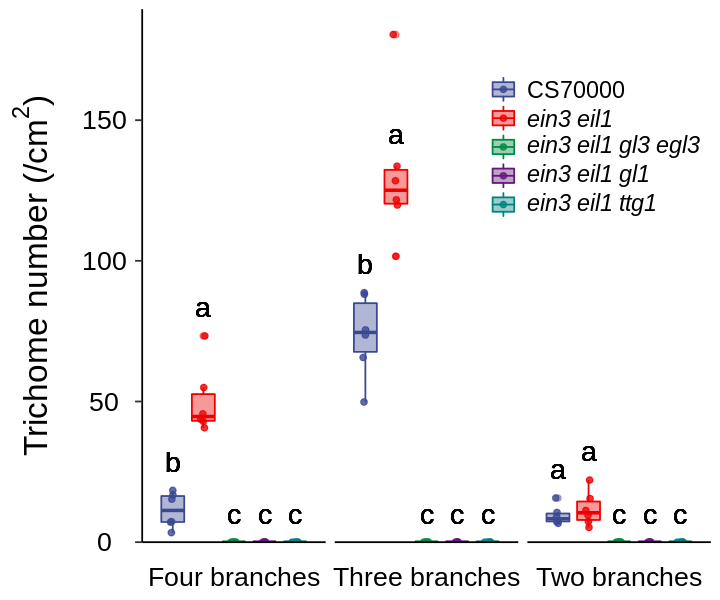

In [9]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6D.csv",
                header=TRUE,
                stringsAsFactors=FALSE,
                quote="")
# set df for sig note
df$max <- apply(df[,c(3:8)],1,max) + 10
df$max[df$branch=="Three branches" & df$genotype=="ein3 eil1"] = 145
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl1",
                                                      "ein3 eil1 gl1",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1"))

df_long$tri_type <- factor(df_long$branch, levels=c("Two branches",
                                                      "Three branches",
                                                      "Four branches"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black", margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
              legend.title = element_blank(),
              legend.position = c(0.8,0.75),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

p <- ggplot(df_long, aes(branch,value, fill=genotype, color=genotype))

D6 <- p + geom_boxplot(alpha=0.4,
                      position = position_dodge(1)) +
    geom_jitter(alpha=0.8, 
                position = position_jitterdodge(jitter.width=0.2, dodge.width=1)
               ) +
    theme_custom() +
    scale_fill_aaas(labels=expression("CS70000",
                                      italic("ein3 eil1"),
#                                       italic("jaz3/4/7/9"),
                                      italic("ein3 eil1 gl3 egl3"),
                                      italic("ein3 eil1 gl1"),
                                      italic("ein3 eil1 ttg1"))) +
    scale_color_aaas(labels=expression("CS70000",
                                      italic("ein3 eil1"),
#                                       italic("jaz3/4/7/9"),
                                      italic("ein3 eil1 gl3 egl3"),
                                      italic("ein3 eil1 gl1"),
                                      italic("ein3 eil1 ttg1"))) + 
    facet_grid(~ branch, scales="free_x", space="free_x") +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("Trichome number (/cm" ^ "2" * ")")) +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap=FALSE, 
              show.legend=FALSE)
D6

### Figure 6E

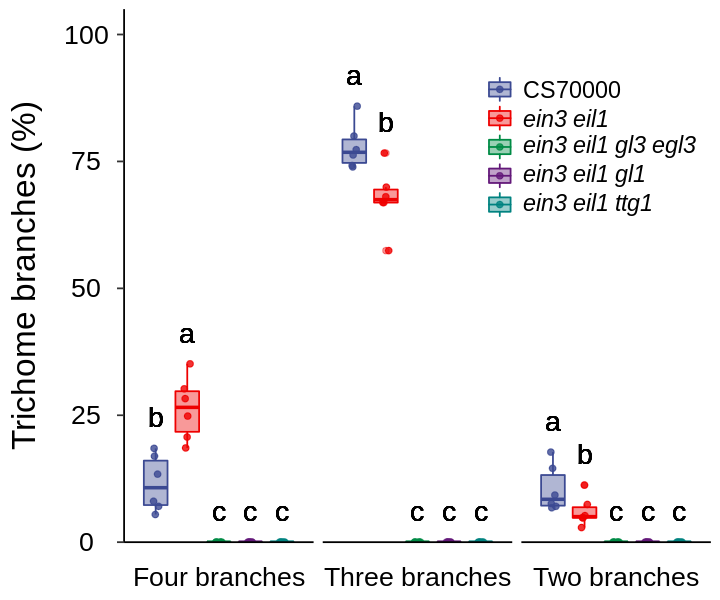

In [10]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6E.csv",
                header=TRUE,
                stringsAsFactors=FALSE,
                quote="")
# set df for sig note
df$max <- apply(df[,c(3:8)],1,max) + 6
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl1",
                                                      "ein3 eil1 gl1",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1"))

df_long$tri_type <- factor(df_long$branch, levels=c("Two branches",
                                                      "Three branches",
                                                      "Four branches"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black", margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
              legend.title = element_blank(),
              legend.position = c(0.8,0.75),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

p <- ggplot(df_long, aes(branch,value, fill=genotype, color=genotype))

E6 <- p + geom_boxplot(alpha=0.4,
                      position = position_dodge(1)) +
    geom_jitter(alpha=0.8, 
                position = position_jitterdodge(jitter.width=0.2, dodge.width=1)
               ) +
    theme_custom() +
    scale_fill_aaas(labels=expression("CS70000",
                                      italic("ein3 eil1"),
#                                       italic("jaz3/4/7/9"),
                                      italic("ein3 eil1 gl3 egl3"),
                                      italic("ein3 eil1 gl1"),
                                      italic("ein3 eil1 ttg1"))) +
    scale_color_aaas(labels=expression("CS70000",
                                      italic("ein3 eil1"),
#                                       italic("jaz3/4/7/9"),
                                      italic("ein3 eil1 gl3 egl3"),
                                      italic("ein3 eil1 gl1"),
                                      italic("ein3 eil1 ttg1"))) + 
    facet_grid(~ branch, scales="free_x", space="free_x") +
    scale_y_continuous(breaks=c(0,25,50,75,100),
                       limits=c(0,100),
                       expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("Trichome branches (%)")) +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap=FALSE, 
              show.legend=FALSE)
E6

### Figure 6F

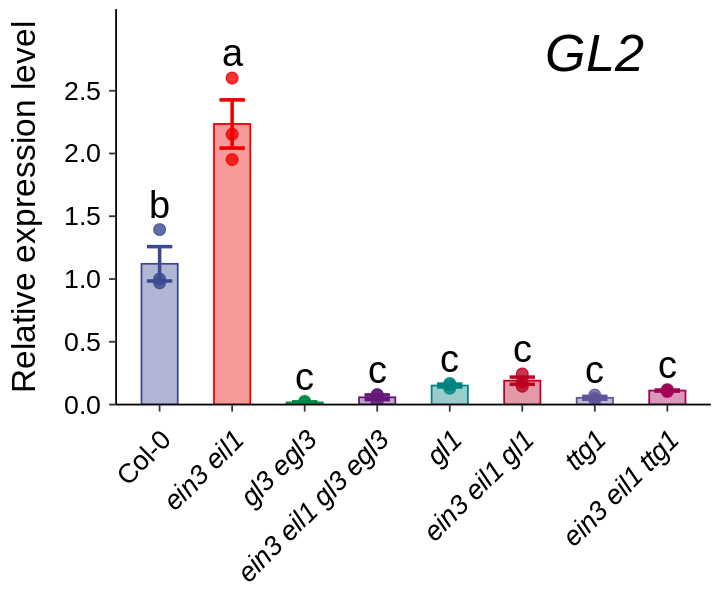

In [11]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6F.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:4)],1,max) + 0.2

# # transformat df
df_long <- gather(df, replicate, value, R1:R3)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl1",
                                                      "ein3 eil1 gl1",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil1")),
               expression(italic("gl3 egl3")),
               expression(italic("ein3 eil1 gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ein3 eil1 gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1 ttg1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
F6 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.5,
                 alpha=0.4, 
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 width = 0.35,                 
                 size=1,
                 show.legend=FALSE) +
    geom_point(alpha=0.8,
                size=3,
                show.legend=FALSE)  +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    annotate(geom="text", x=7, y=2.8,size=11,
            label=expression(italic("GL2"))) +
    scale_y_continuous(breaks=c(0,0.5,1,1.5,2.0, 2.5),
                       limits=c(0,3),
                       expand = expansion(mult = c(0, 0.05)))
F6


### Figure 6G

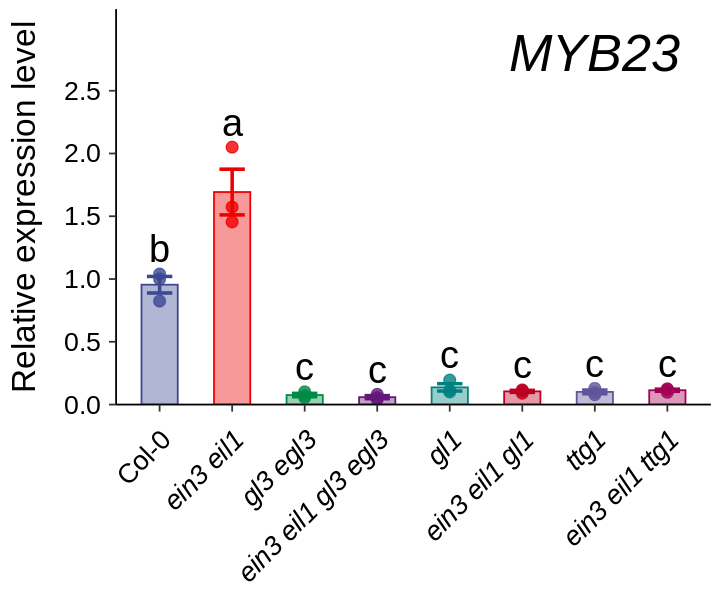

In [12]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6G.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:4)],1,max) + 0.2

# # transformat df
df_long <- gather(df, replicate, value, R1:R3)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl1",
                                                      "ein3 eil1 gl1",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil1")),
               expression(italic("gl3 egl3")),
               expression(italic("ein3 eil1 gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ein3 eil1 gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1 ttg1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
G6 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.5,
                 alpha=0.4, 
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 width = 0.35,                 
                 size=1,
                 show.legend=FALSE) +
    geom_point(alpha=0.8,
                size=3,
                show.legend=FALSE)  +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    annotate(geom="text", x=7, y=2.8,size=11,
            label=expression(italic("MYB23"))) +
    scale_y_continuous(breaks=c(0,0.5,1,1.5,2.0, 2.5),
                       limits=c(0,3),
                       expand = expansion(mult = c(0, 0.05)))
G6


### Figure 6H

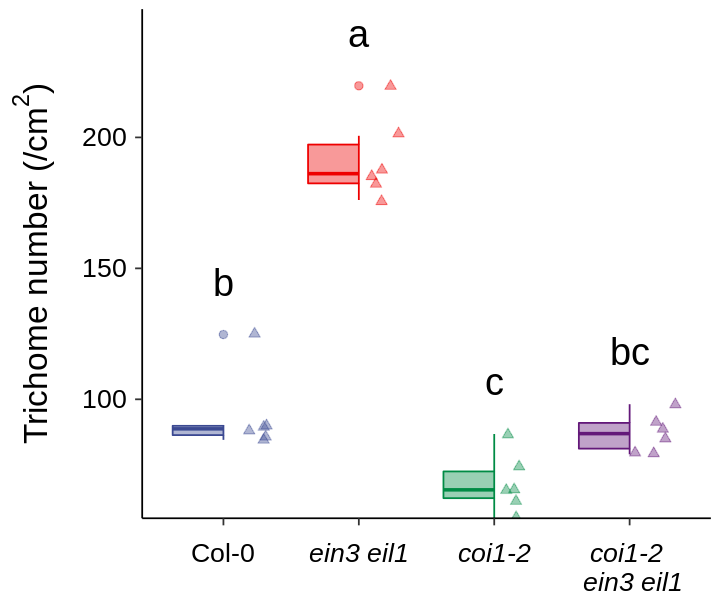

In [13]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6H.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:7)],1,max) + 20

# transformat df
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "coi1-2",
                                                      "coi1-2 ein3 eil1"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black",
                                         hjust=0.5, vjust=0,
                                         margin = margin(t = 25, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 5)

# generate x-tick label vector
xtick_labs <- c("Col-0\n",
               expression(italic("ein3 eil1\n")),
               expression(italic("coi1-2\n")),
               expression(italic("  coi1-2 \n ein3 eil1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
H6 <- p + geom_boxjitter(alpha=0.4,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Trichome number (/cm" ^ "2" * ")")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))

H6


## Combination

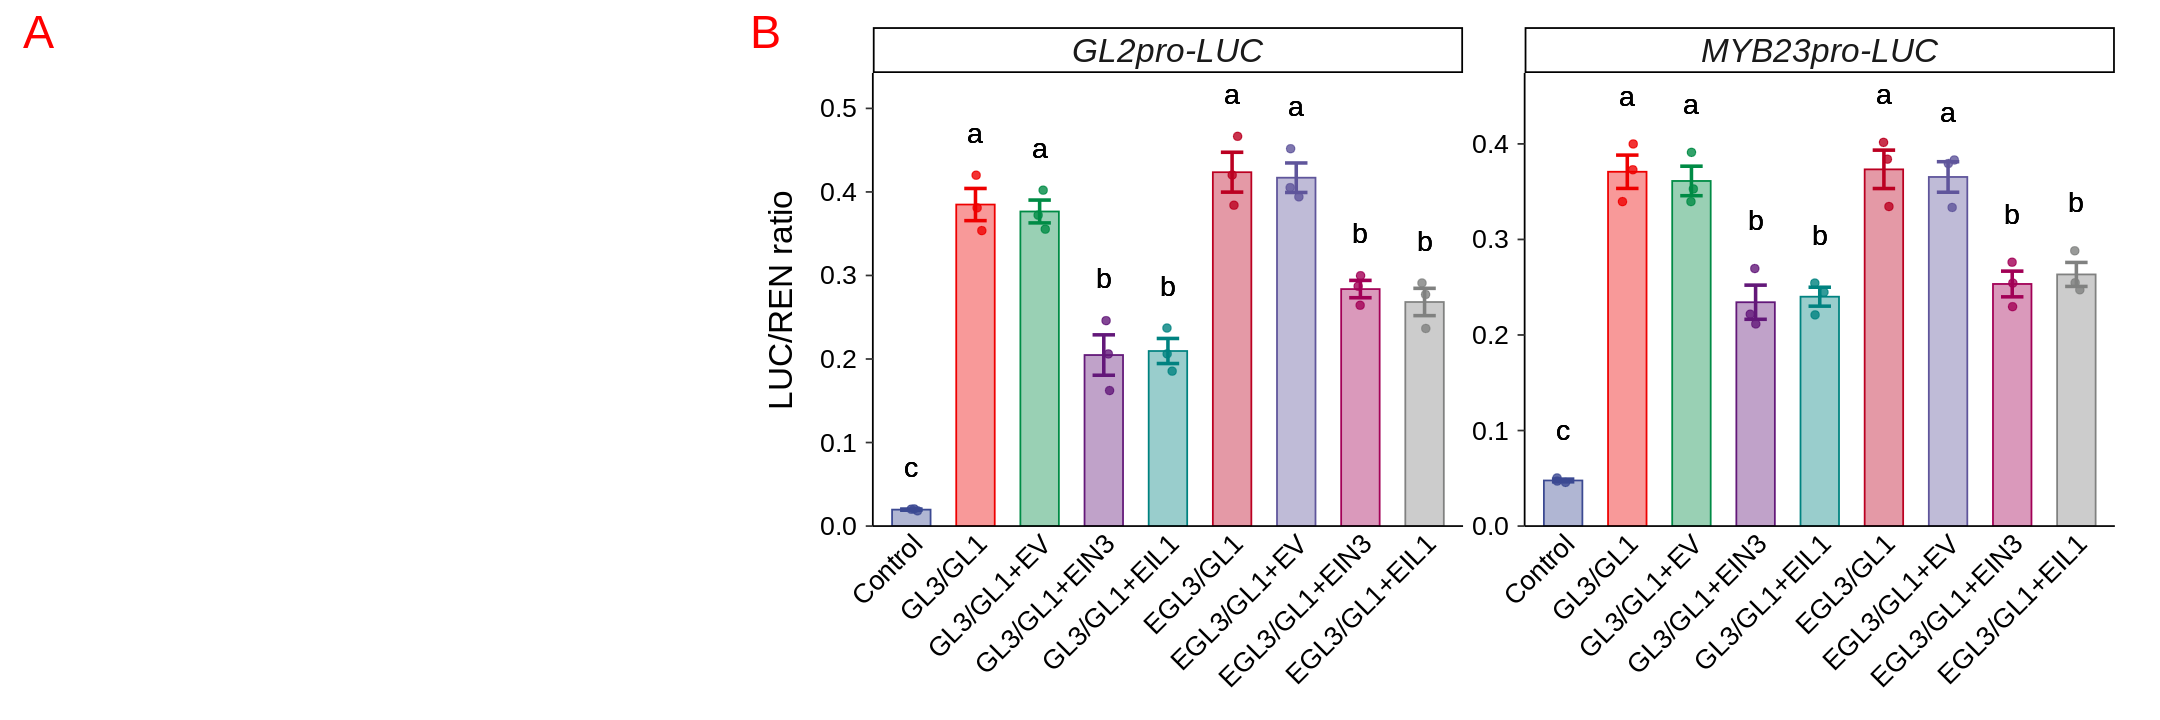

In [14]:
options(repr.plot.width = 18, repr.plot.height = 6)
fig6_p1 <- plot_grid(NULL,B6,
          ncol=2,
          rel_widths=c(1,2),
          labels = c('A','B'),
          label_colour = 'red',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                    scale=0.95)
fig6_p1

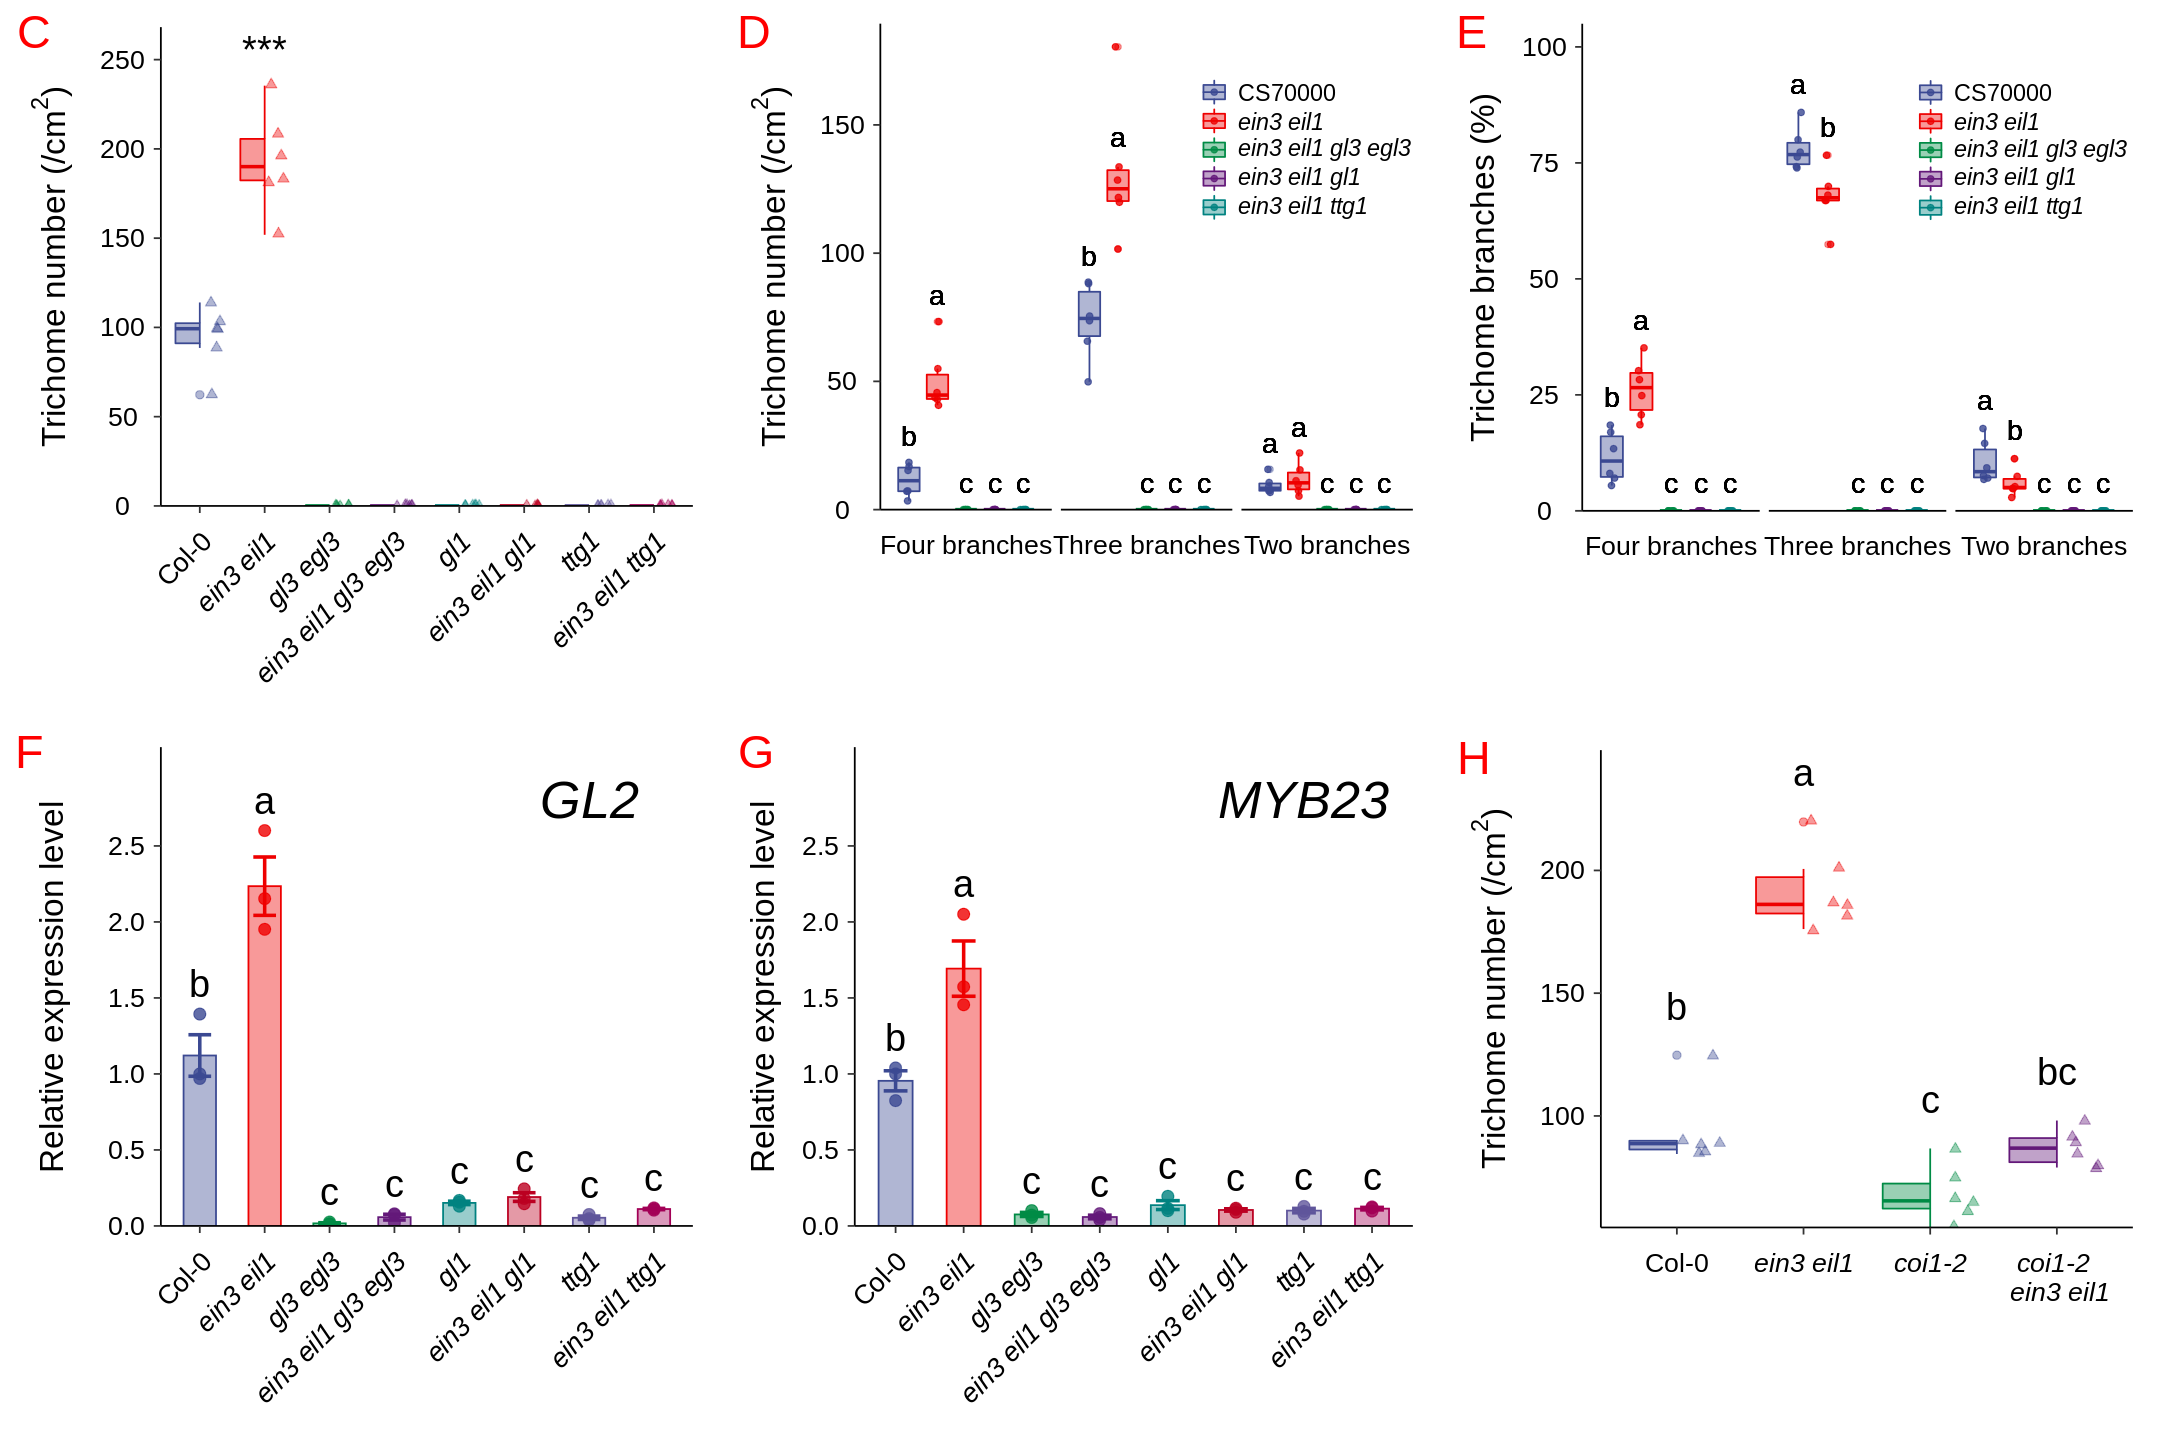

In [15]:
options(repr.plot.width = 6, repr.plot.height = 12)
fig6_p21 <- plot_grid(C6,F6,
                     align="v",
          ncol=1,
          labels = c('C','F'),
          label_colour = 'red',
          label_x = 0.0,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                     scale=0.95)

options(repr.plot.width = 6, repr.plot.height = 12)
fig6_p22 <- plot_grid(D6,NULL,G6,
                     align="v",
          ncol=1,
          rel_heights=c(4.85,1.15,6),
          labels = c('D','','G'),
          label_colour = 'red',
          label_x = 0.0,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                     scale=0.95)

options(repr.plot.width = 6, repr.plot.height = 12)
fig6_p23 <- plot_grid(E6,NULL,H6,NULL,
                     align="v",
          ncol=1,
          rel_heights=c(4.82,1.18,4.95,0.95),
          labels = c('E','','H',''),
          label_colour = 'red',
          label_x = 0.0,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                     scale=0.95)

options(repr.plot.width = 18, repr.plot.height = 12)
fig6_p2 <- plot_grid(fig6_p21, fig6_p22, fig6_p23, nrow=1)
fig6_p2

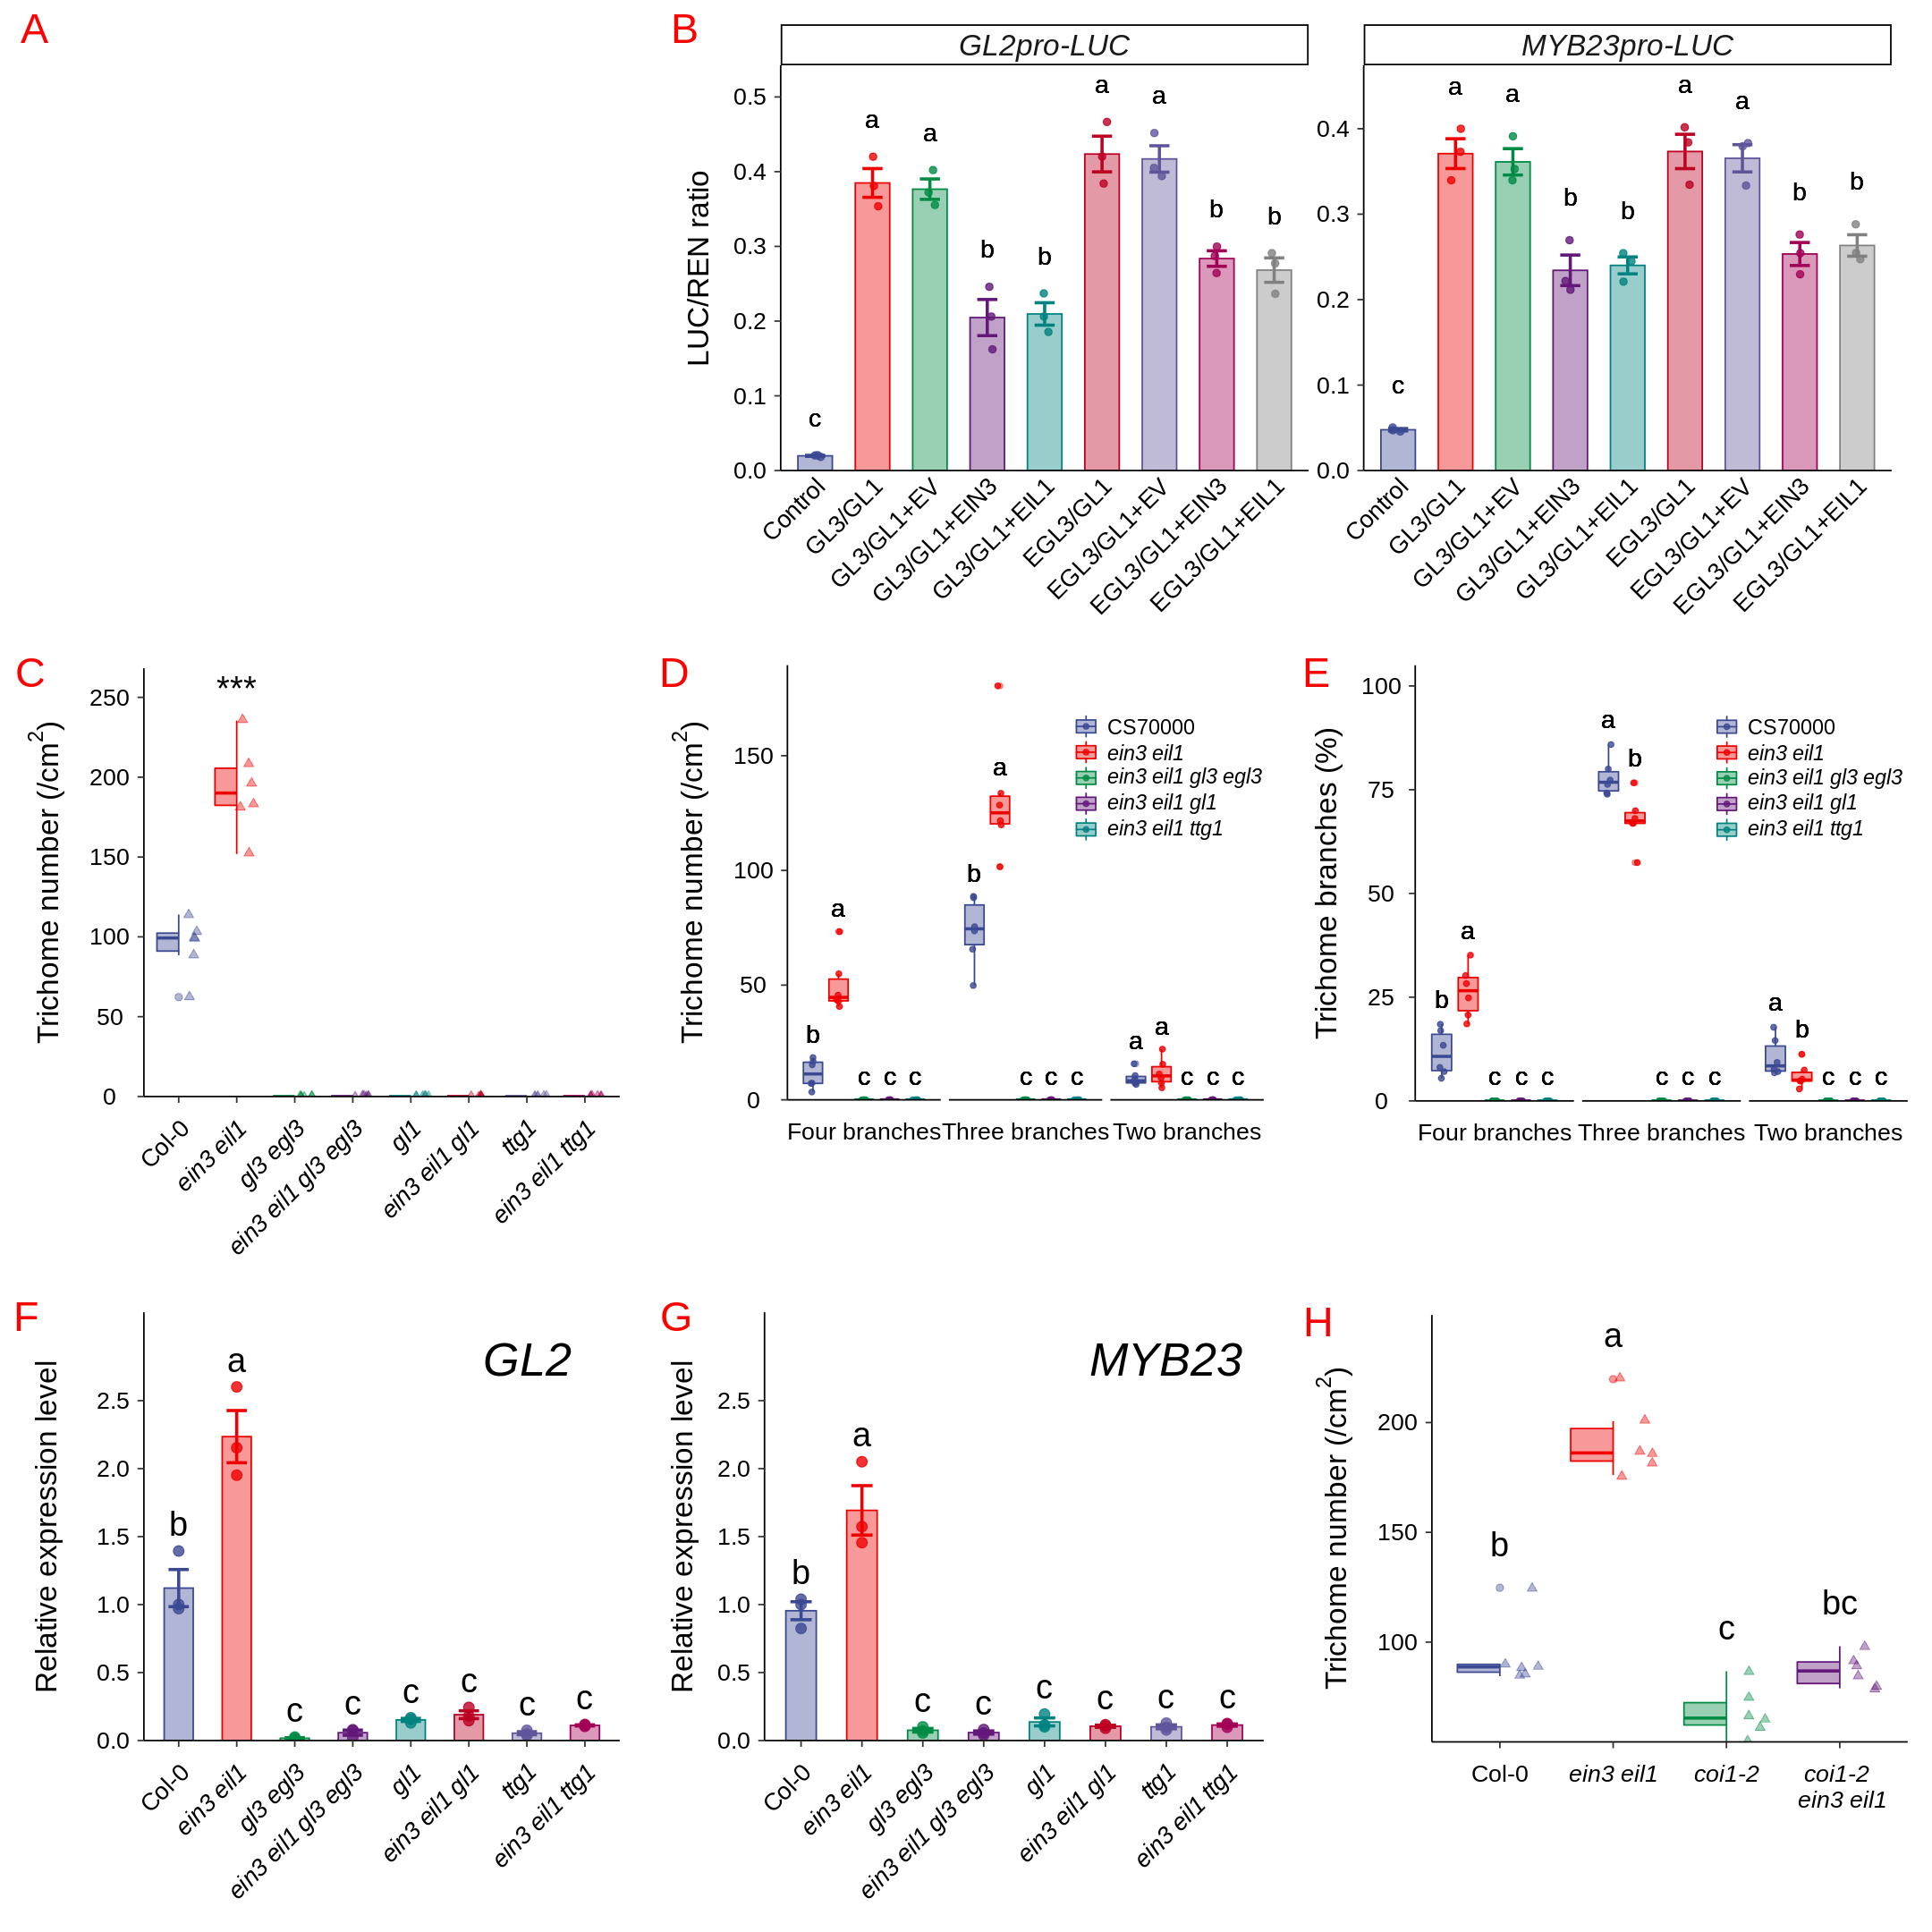

In [16]:
options(repr.plot.width = 18, repr.plot.height = 18)
fig6 <- plot_grid(fig6_p1, fig6_p2, 
                  ncol=1,
                  rel_heights=c(6,12))
fig6
# ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/6_fig_done/Figure6.png",
#       fig6, height=18, width=18, dpi=300)